In [22]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble, datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Gradient boost with SKLearn

Use European Survey Data, try to predict whether or not someone lives with a partner (categorical outcome)

In [24]:
#load data
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

#set target and data
y = df['partner'] - 1 #set outcome to binary, partner values are 1 or 2
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

#transform categorical country into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

#create train and test sets
offset = int(X.shape[0] * .9)

#put 90% into train, 10% into test
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0
10,CH,55.0,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0


- Switch to classifier since outcome is binary
- Loss function can't be residuals like with regressor
- Loss function options are deviance or exponential

In [3]:
#logistic regression uses deviance, try that
params = {'n_estimators':500,
          'max_depth':2,
          'loss':'deviance'}

#instantiate and fit model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

#accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

#recall error types
#type I is false positive, eg predicts True when False
#type II is false negative, eg predicts False when True
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


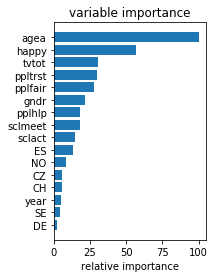

In [4]:
#get measure of how important features are by counting how many times
#feature is used over the course of the many decision trees
feature_importance = clf.feature_importances_

#make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('relative importance')
plt.title('variable importance')
plt.show()

__Result:__ age and happiness are the most important features in predicting whether or not someone lives with a partner

## Drill: improve this gradient boost model
Try to reduce type I and II error rates as much as possible. Possible strategies include…
- Creating new features
- Apply overfitting prevention strategies (eg subsampling)
- More iterations
- Try different loss function
- Change structure of the weak learner (number of leaves, depth, etc)

In [5]:
#add r2 scores from baseline model to compare
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

### Attempt 1: adjust parameters

In [6]:
#increase iterations from 500 to 1000
#increase max depth from 2 to 4
#change loss function from deviance to exponential
params1 = {'n_estimators': 1000,
           'max_depth':4,
           'loss':'deviance'}

#updated model, predictions, and accuracy calculations
clf1 = ensemble.GradientBoostingClassifier(**params1)
clf1.fit(X_train,y_train)

predict_train1 = clf1.predict(X_train)
predict_test1 = clf1.predict(X_test)

train_score1 = clf1.score(X_train, y_train)
test_score1 = clf1.score(X_test, y_test)

table_train1 = pd.crosstab(y_train, predict_train1, margins=True)
table_test1 = pd.crosstab(y_test, predict_test1, margins=True)

train_tI_errors1 = table_train1.loc[0.0,1.0] / table_train1.loc['All','All']
train_tII_errors1 = table_train1.loc[1.0,0.0] / table_train1.loc['All','All']

test_tI_errors1 = table_test1.loc[0.0,1.0] / table_test1.loc['All','All']
test_tII_errors1 = table_test1.loc[1.0,0.0] / table_test1.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score1, train_tI_errors1, train_tII_errors1,
         test_score1, test_tI_errors1, test_tII_errors1))

Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.9079378068739771
Percent Type I errors: 0.011320240043644299
Percent Type II errors: 0.08074195308237861

Test set accuracy:
R^2 score: 0.7165644171779141
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.17914110429447852


__Result:__ changing parameters doesn't have too much effect on predicting this data, and for the most part decreases in training set error did not translate to the test set; indicative model is overfitting

__Note:__ many different iteration and depths were tried one at a time, each with deviance and exponential loss functions; there was no real improvement seen

### Attempt 2: overfitting prevention

In [7]:
#apply subsample & learning rate
params2 = {'n_estimators': 500,
           'max_depth':2,
           'loss':'deviance',
           'subsample':.9,
           'learning_rate':.9}

#updated model, predictions, and accuracy calculations
clf2 = ensemble.GradientBoostingClassifier(**params2)
clf2.fit(X_train,y_train)

predict_train2 = clf2.predict(X_train)
predict_test2 = clf2.predict(X_test)

train_score2 = clf2.score(X_train, y_train)
test_score2 = clf2.score(X_test, y_test)

table_train2 = pd.crosstab(y_train, predict_train2, margins=True)
table_test2 = pd.crosstab(y_test, predict_test2, margins=True)

train_tI_errors2 = table_train2.loc[0.0,1.0] / table_train2.loc['All','All']
train_tII_errors2 = table_train2.loc[1.0,0.0] / table_train2.loc['All','All']

test_tI_errors2 = table_test2.loc[0.0,1.0] / table_test2.loc['All','All']
test_tII_errors2 = table_test2.loc[1.0,0.0] / table_test2.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score2, train_tI_errors2, train_tII_errors2,
         test_score2, test_tI_errors2, test_tII_errors2))

Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.8211947626841244
Percent Type I errors: 0.04228041462084015
Percent Type II errors: 0.13652482269503546

Test set accuracy:
R^2 score: 0.7128834355828221
Percent Type I errors: 0.12392638036809817
Percent Type II errors: 0.16319018404907976


__Result:__ overfits less but not much increase in predictive accuracy, still performs worse than baseline model

### Attempt 3: feature selection

In [8]:
#keep separate from original df
#ONLY RUN THIS ONCE or it will keep subtracting from partners
df_features = df
df_features['partner'] = df_features['partner'] - 1

In [9]:
#get dummies for cntry, drop idno and cntry
df_features = df_features.loc[:, ~df.columns.isin(['idno'])]
df_features = pd.concat([df_features,
                         pd.get_dummies(df_features['cntry'])], axis=1)
df_features = df_features.drop('cntry',1)
df_features.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,0.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,0.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,0.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,0.0,1,0,0,0,0,0


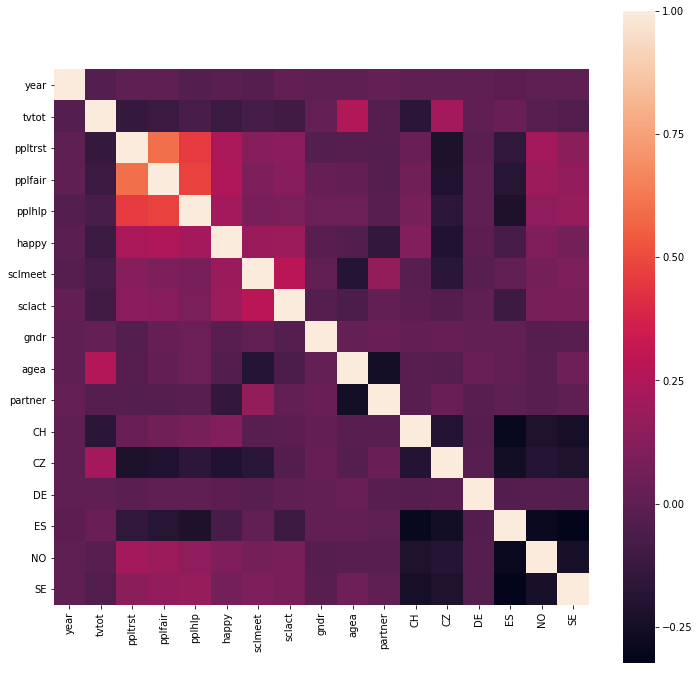

In [10]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df_features.corr(), square=True)
plt.show()

In [21]:
#pplfair, pplhlp, and ppltrst showing multicollinearity
#combine to single feature
means = df_features[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df_features[['ppltrst','pplfair','pplhlp']].std(axis=0)
df_features['trst_fair_hlp'] = (
    (df_features[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
df_features = df_features.loc[:, ~(df_features.columns.isin([
    'ppltrst',
    'pplfair',
    'pplhlp']))]
df_features

KeyError: "['ppltrst' 'pplfair' 'pplhlp'] not in index"

In [12]:
#set target and data
y2 = df_features['partner']
X2 = df_features.loc[:, ~df_features.columns.isin(['partner'])]

#create new train and test sets
offset2 = int(X2.shape[0] * .9)

#put 90% into train, 10% into test
X_train2, y_train2 = X2[:offset2], y2[:offset2]
X_test2, y_test2 = X2[offset2:], y2[offset2:]

In [13]:
#try original model params on this dataset
params3 = {'n_estimators':500,
           'max_depth':2,
           'loss':'deviance',}

clf3 = ensemble.GradientBoostingClassifier(**params3)
clf3.fit(X_train2,y_train2)

predict_train3 = clf3.predict(X_train2)
predict_test3 = clf3.predict(X_test2)

train_score3 = clf3.score(X_train2, y_train2)
test_score3 = clf3.score(X_test2, y_test2)

table_train3 = pd.crosstab(y_train2, predict_train3, margins=True)
table_test3 = pd.crosstab(y_test2, predict_test3, margins=True)

train_tI_errors3 = table_train3.loc[0.0,1.0] / table_train3.loc['All','All']
train_tII_errors3 = table_train3.loc[1.0,0.0] / table_train3.loc['All','All']

test_tI_errors3 = table_test3.loc[0.0,1.0] / table_test3.loc['All','All']
test_tII_errors3 = table_test3.loc[1.0,0.0] / table_test3.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score3, train_tI_errors3, train_tII_errors3,
         test_score3, test_tI_errors3, test_tII_errors3))

Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.7809601745771959
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.17416803055100927

Test set accuracy:
R^2 score: 0.7558282208588957
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18650306748466258


__Result:__ performs slightly better than base model, but not much

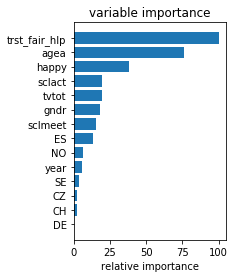

In [14]:
#see how feature importance is affected
feature_importance3 = clf3.feature_importances_

#make importances relative to max importance
feature_importance3 = 100.0 * (feature_importance3 / feature_importance3.max())
sorted_idx3 = np.argsort(feature_importance3)
pos3 = np.arange(sorted_idx3.shape[0]) + .5
plt.subplot(1,2,2)
plt.barh(pos3, feature_importance3[sorted_idx3], align='center')
plt.yticks(pos3, X2.columns[sorted_idx3])
plt.xlabel('relative importance')
plt.title('variable importance')
plt.show()

__Result:__ combined feature seems to have strong predictive power now, try this model on different sets of top features

In [19]:
X3 = df_features.loc[:, df_features.columns.isin(['trst_fair_help',
                                                  'agea',
                                                  'happy',
                                                  'sclact',
                                                  'tvtot',
                                                  'gndr',
                                                  'sclmeet'])]

#create new train and test sets
offset3 = int(X3.shape[0] * .9)

#put 90% into train, 10% into test
X_train3, y_train3 = X3[:offset3], y2[:offset3]
X_test3, y_test3 = X3[offset3:], y2[offset3:]

In [20]:
clf3.fit(X_train3,y_train3)

predict_train3 = clf3.predict(X_train3)
predict_test3 = clf3.predict(X_test3)

train_score3 = clf3.score(X_train3, y_train3)
test_score3 = clf3.score(X_test3, y_test3)

table_train3 = pd.crosstab(y_train3, predict_train3, margins=True)
table_test3 = pd.crosstab(y_test3, predict_test3, margins=True)

train_tI_errors3 = table_train3.loc[0.0,1.0] / table_train3.loc['All','All']
train_tII_errors3 = table_train3.loc[1.0,0.0] / table_train3.loc['All','All']

test_tI_errors3 = table_test3.loc[0.0,1.0] / table_test3.loc['All','All']
test_tII_errors3 = table_test3.loc[1.0,0.0] / table_test3.loc['All','All']

print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score3, train_tI_errors3, train_tII_errors3,
         test_score3, test_tI_errors3, test_tII_errors3))


Current results:

Training set accuracy:
R^2 score: 0.7712765957446809
Percent Type I errors: 0.048827059465357335
Percent Type II errors: 0.1798963447899618

Test set accuracy:
R^2 score: 0.7423312883435583
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.19877300613496932


__Result:__ eliminating features, even ones that don't explain much variance on their own, does not result in better predictions for this data.